In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gefera as gf

In [18]:
t = np.linspace(-0.6, 0.2, 10000)

ap = 215
tp = -91.25
ep = 0.0
pp = 365
wp = 0.1 * np.pi / 180
ip = 89.8 * np.pi / 180

am = 10
tm = -4.2
em = 0.0
pm = 8
om = 45 * np.pi / 180
wm = -90 * np.pi / 180
im = 90.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.1
rm = 0.06

CPU times: user 17.6 ms, sys: 9.72 ms, total: 27.3 ms
Wall time: 31.6 ms


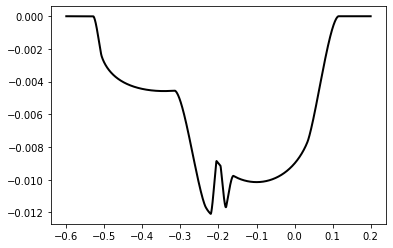

In [19]:
po = gf.orbits.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.orbits.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.systems.HierarchicalSystem(po, mo)

%time flux, grad_flux = sys.lightcurve(t, u1, u2, rp, rm, grad=True)

plt.plot(t, flux, color='k', linewidth=2)

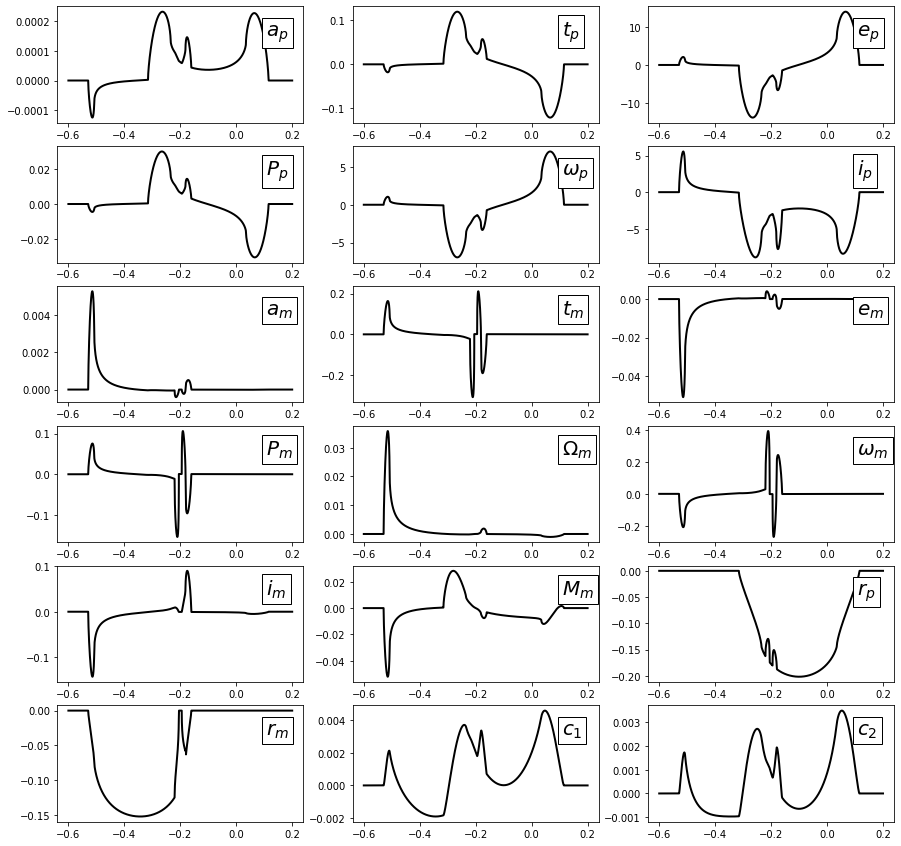

In [20]:
fig, axs = plt.subplots(6, 3, figsize=(15, 15))
axs = axs.flatten()

names = [
    r'$a_p$', r'$t_p$', r'$e_p$', r'$P_p$', r'$\omega_p$', 
    r'$i_p$', r'$a_m$', r'$t_m$', r'$e_m$', r'$P_m$', 
    r'$\Omega_m$', r'$\omega_m$', r'$i_m$', r'$M_m$', 
    r'$r_p$', r'$r_m$', r'$c_1$', r'$c_2$'
]

for i, (name, g) in enumerate(list(grad_flux.items())):
        
    axs[i].plot(t, g, color='k', linewidth=2)
    axs[i].annotate(
        names[i], 
        xy=(0.85, 0.75), 
        xycoords='axes fraction', 
        fontsize=20, bbox={'facecolor': 'w'}
    )

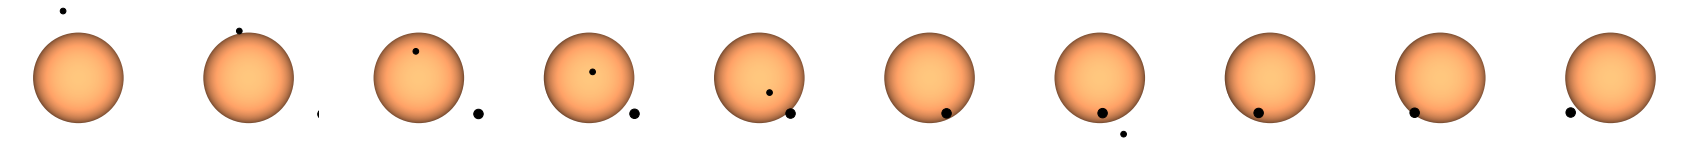

In [21]:
times = t[::1000]
fig, axs = plt.subplots(1, len(times), figsize=(30, 3))
gf.animate.snapshots(sys, axs, times, rp, rm, ld_params=[u1, u2])